### **Analysis Prophet prediction**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import glob
import numpy as np

In [18]:
sub = pd.read_csv(os.path.join("rawdata","sample_submission.csv"))
sub

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,Total_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CA_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TX_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WI_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CA_1_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771115,FOODS_3_823_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771116,FOODS_3_824_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771117,FOODS_3_825_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771118,FOODS_3_826_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = pd.concat(map(pd.read_pickle,glob.glob(os.path.join("submission_uncertainty","Prophet_v1_gaussian","*.pickle"))))
data = data.set_index("id",drop=True)
data = data.loc[sub["id"]]
data = data.dropna()

data

C:\Users\organ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


d,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
id,,,,,,,,,,,,,,,,,,,,,
Total_X_0.005_validation,26097.783733,23187.968974,22690.641525,23371.179609,27701.248842,34096.473565,33955.841849,25958.863176,23433.406721,22522.945677,...,27122.624362,34357.646213,33633.182335,26515.497056,22463.484161,23562.761142,22617.970360,28303.218054,34843.034097,34412.342500
CA_X_0.005_validation,11910.169400,10616.051701,10055.649925,10170.090106,12065.836967,15295.694221,15830.607896,11663.821044,10555.388413,10101.042650,...,11906.174212,15518.534010,15666.575306,11889.790743,10422.378364,10381.423323,10128.621574,11880.276445,15423.367150,15962.004663
TX_X_0.005_validation,6714.632915,5777.498681,5625.676614,5700.774337,6773.975893,8607.211904,8994.142478,6553.702321,5889.497960,5505.872957,...,6397.776847,8660.437278,8863.628230,6627.703923,5703.724767,5716.935805,5747.490722,6593.110345,8710.602977,9107.839327
WI_X_0.005_validation,5672.728001,5510.987209,5656.523397,5200.814839,6785.122034,8601.664964,7360.639275,5705.045567,5344.560969,5030.391292,...,7059.355847,8411.956188,7496.434086,5788.733754,5373.851301,5229.361290,5389.671747,7125.407875,8939.479313,7860.753764
CA_1_X_0.005_validation,2532.637237,2030.942977,1858.301470,1935.965653,2589.164114,3686.025447,3639.653282,2500.123992,2137.898598,2009.062014,...,2517.070133,3646.035401,3748.456556,2405.006175,2103.291083,1952.744935,1915.209269,2564.524039,3687.547046,3817.984272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOODS_3_823_WI_3_0.995_validation,3.923479,3.885975,4.242358,3.876428,4.041604,4.092371,4.183935,4.239961,4.159880,4.224820,...,4.335477,4.132297,4.373445,4.404224,4.291022,4.221378,4.121930,4.001563,3.907998,4.257790
FOODS_3_824_WI_3_0.995_validation,3.119774,3.112451,3.043969,2.836871,2.874406,3.101010,2.899003,2.919161,2.775983,2.936851,...,2.811801,2.874644,2.959903,3.079501,2.824728,2.892320,2.998740,2.899592,2.970880,3.123211
FOODS_3_825_WI_3_0.995_validation,5.577410,5.396055,5.207957,5.258443,5.200725,5.481568,5.408553,5.594741,5.399643,5.353543,...,5.141794,5.284938,5.104004,5.248977,4.869151,5.006625,5.057129,5.147653,5.160273,5.200643


In [21]:
best_sub = pd.read_csv(os.path.join("submission_uncertainty","None_model_with_M5-Forecasting-EDA_FE_and_Modelings_ppred_poisson.csv"))
best_sub = best_sub.set_index("id",drop=True)
best_sub = best_sub.loc[data.index]
best_sub

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
id,,,,,,,,,,,,,,,,,,,,,
Total_X_0.005_validation,38287.0,35003.0,33968.0,34253.0,42363.0,49852.0,52440.0,42647.0,43773.0,39089.0,...,43533.0,53709.0,59291.0,41833.0,38271.0,36601.0,36469.0,42022.0,50934.0,53739.0
CA_X_0.005_validation,17184.0,14697.0,14523.0,14353.0,16843.0,21943.0,23293.0,18762.0,17487.0,16928.0,...,18122.0,22647.0,24300.0,17379.0,15824.0,15356.0,15969.0,17091.0,22712.0,24241.0
TX_X_0.005_validation,10397.0,9677.0,9324.0,9403.0,11879.0,12405.0,13887.0,10453.0,11668.0,9654.0,...,12035.0,12081.0,15922.0,11944.0,11096.0,10114.0,8916.0,12018.0,13381.0,14502.0
WI_X_0.005_validation,10343.0,10278.0,9777.0,10151.0,13255.0,15089.0,14834.0,13048.0,14225.0,12140.0,...,12986.0,18552.0,18614.0,12127.0,10985.0,10773.0,11229.0,12528.0,14422.0,14566.0
CA_1_X_0.005_validation,4301.0,3547.0,3559.0,3464.0,4400.0,5701.0,6192.0,4617.0,4420.0,4067.0,...,4771.0,6042.0,6497.0,4395.0,3788.0,3833.0,3971.0,4262.0,5569.0,6086.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOODS_3_823_WI_3_0.995_validation,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,6.0,0.0,...,4.0,0.0,8.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0
FOODS_3_824_WI_3_0.995_validation,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0
FOODS_3_825_WI_3_0.995_validation,0.0,0.0,4.0,4.0,0.0,6.0,4.0,4.0,0.0,0.0,...,0.0,0.0,4.0,6.0,0.0,4.0,0.0,4.0,0.0,6.0


In [22]:
data = data.reset_index()
data = pd.melt(data, id_vars=["id"], var_name = 'd', value_name = 'Prophet_pred')
data

,id,d,Prophet_pred
0,Total_X_0.005_validation,F1,26097.783733
1,CA_X_0.005_validation,F1,11910.169400
2,TX_X_0.005_validation,F1,6714.632915
3,WI_X_0.005_validation,F1,5672.728001
4,CA_1_X_0.005_validation,F1,2532.637237
...,...,...,...
10795675,FOODS_3_823_WI_3_0.995_validation,F28,4.257790
10795676,FOODS_3_824_WI_3_0.995_validation,F28,3.123211
10795677,FOODS_3_825_WI_3_0.995_validation,F28,5.200643
10795678,FOODS_3_826_WI_3_0.995_validation,F28,5.024500


In [24]:
best_sub = best_sub.reset_index()
best_sub = pd.melt(best_sub, id_vars=["id"], var_name = 'd', value_name = 'Best_pred')
best_sub

,id,d,Best_pred
0,Total_X_0.005_validation,F1,38287.0
1,CA_X_0.005_validation,F1,17184.0
2,TX_X_0.005_validation,F1,10397.0
3,WI_X_0.005_validation,F1,10343.0
4,CA_1_X_0.005_validation,F1,4301.0
...,...,...,...
10795675,FOODS_3_823_WI_3_0.995_validation,F28,4.0
10795676,FOODS_3_824_WI_3_0.995_validation,F28,0.0
10795677,FOODS_3_825_WI_3_0.995_validation,F28,6.0
10795678,FOODS_3_826_WI_3_0.995_validation,F28,0.0


In [27]:
plot_data = pd.merge(data[["id","d","Prophet_pred"]],best_sub[["id","d","Best_pred"]],on=["id","d"],how="left")
plot_data

,id,d,Prophet_pred,Best_pred
0,Total_X_0.005_validation,F1,26097.783733,38287.0
1,CA_X_0.005_validation,F1,11910.169400,17184.0
2,TX_X_0.005_validation,F1,6714.632915,10397.0
3,WI_X_0.005_validation,F1,5672.728001,10343.0
4,CA_1_X_0.005_validation,F1,2532.637237,4301.0
...,...,...,...,...
10795675,FOODS_3_823_WI_3_0.995_validation,F28,4.257790,4.0
10795676,FOODS_3_824_WI_3_0.995_validation,F28,3.123211,0.0
10795677,FOODS_3_825_WI_3_0.995_validation,F28,5.200643,6.0
10795678,FOODS_3_826_WI_3_0.995_validation,F28,5.024500,0.0


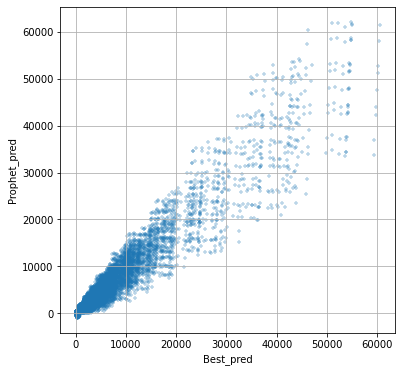

In [29]:
plot_data.plot.scatter(x="Best_pred",
                  y="Prophet_pred",
                  marker="+",
                  alpha=0.3,
                  figsize=(6,6))
plt.grid(True)
plt.show()